In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime


In [2]:
# Set timeframe, starting at January 1, 2016
start1 = datetime.datetime(2000,1,1)
end1 = datetime.date.today()
print ("Today's Date = "+ str(end1))
print ("Starting date of analysis =" + str(start1))

Today's Date = 2019-03-07
Starting date of analysis =2000-01-01 00:00:00


In [3]:
sp500 = web.DataReader('^GSPC',data_source='yahoo', start=start1, end=end1)

In [4]:
sp500.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-28,2793.729980,2782.510010,2788.110107,2784.489990,4396930000,2784.489990
2019-03-01,2808.020020,2787.379883,2798.219971,2803.689941,3972280000,2803.689941
2019-03-04,2816.879883,2767.659912,2814.370117,2792.810059,3919810000,2792.810059
2019-03-05,2796.439941,2782.969971,2794.409912,2789.649902,3585690000,2789.649902
2019-03-06,2790.270020,2768.689941,2790.270020,2771.449951,3786600000,2771.449951


In [31]:
apple = web.DataReader('AAPL', data_source='yahoo', start=start1, end=end1)

In [6]:
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-28,279.450012,278.320007,278.959991,278.679993,69268300.0,278.679993
2019-03-01,280.880005,278.820007,280.440002,280.420013,78880500.0,280.420013
2019-03-04,281.869995,276.839996,281.600006,279.399994,106494600.0,279.399994
2019-03-05,279.760010,278.410004,279.540009,279.019989,59114600.0,279.019989
2019-03-06,279.160004,276.970001,279.149994,277.329987,74868600.0,277.329987


Populating the interactive namespace from numpy and matplotlib


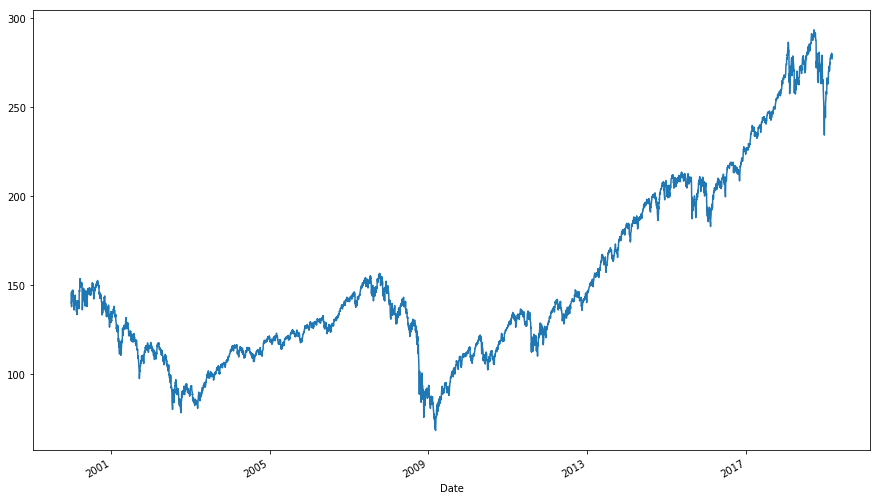

In [7]:
import matplotlib.pyplot as plt

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Close"].plot() # Plot the adjusted closing price of AAPL

In [8]:
#microsoft, google, micron = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["MSFT", "GOOG", "MU"])

microsoft, google, micron = (web.DataReader(s, data_source='yahoo', start=start1, end=end1) for s in ["MSFT", "GOOG", "MU"])

# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Close"],
                      "MSFT": microsoft["Close"],
                      "GOOG": google["Close"],
                      "MU": micron["Close"]})
 
stocks.tail()

,AAPL,MSFT,GOOG,MU
Date,,,,
2019-02-28,278.679993,112.029999,1119.920044,40.880001
2019-03-01,280.420013,112.529999,1140.989990,41.580002
2019-03-04,279.399994,112.260002,1147.800049,41.060001
2019-03-05,279.019989,111.699997,1162.030029,39.990002
2019-03-06,277.329987,111.750000,1157.859985,37.930000


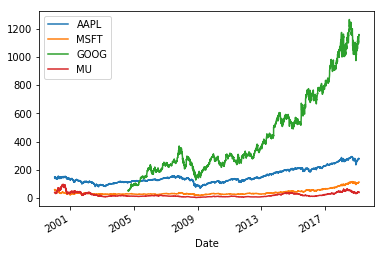

In [9]:
stocks.plot()

In [10]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1

,AAPL,MSFT,GOOG,MU
Date,,,,
2000-01-03,0.000000,0.000000,NaN,0.000000
2000-01-04,-0.039106,-0.033780,NaN,-0.038683
2000-01-05,-0.037387,-0.023592,NaN,-0.041975
2000-01-06,-0.052858,-0.056300,NaN,-0.025514
2000-01-07,0.002149,-0.043968,NaN,-0.071605


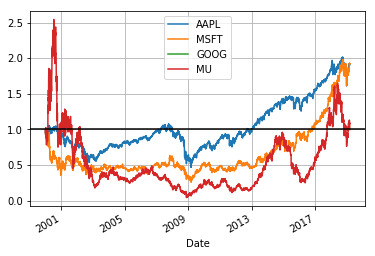

In [11]:
stock_return.plot(grid = True).axhline(y = 1, color = "black")

In [12]:
#stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
#stock_change.head()

In [13]:
# Create a rolling mean over the time window in days of your choice.
apple['63'] = np.round(apple['Close'].rolling(window=63, center=False).mean(),2)
apple['189'] = np.round(apple['Close'].rolling(window=189, center=False).mean(),2)


In [14]:
apple[['Close', '63','189']].tail()

,Close,63,189
Date,,,
2019-02-28,278.679993,264.49,274.83
2019-03-01,280.420013,264.68,274.87
2019-03-04,279.399994,264.75,274.91
2019-03-05,279.019989,264.83,274.94
2019-03-06,277.329987,264.86,274.95


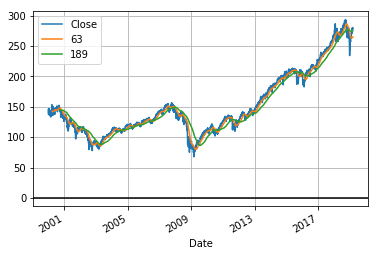

In [15]:
apple[['Close', '63','189']].plot(grid = True).axhline(y = 1, color = "black")

In [16]:
apple['63d-189d'] = apple['63'] - apple['189']
apple.tail()

,High,Low,Open,Close,Volume,Adj Close,63,189,63d-189d
Date,,,,,,,,,
2019-02-28,279.450012,278.320007,278.959991,278.679993,69268300.0,278.679993,264.49,274.83,-10.34
2019-03-01,280.880005,278.820007,280.440002,280.420013,78880500.0,280.420013,264.68,274.87,-10.19
2019-03-04,281.869995,276.839996,281.600006,279.399994,106494600.0,279.399994,264.75,274.91,-10.16
2019-03-05,279.760010,278.410004,279.540009,279.019989,59114600.0,279.019989,264.83,274.94,-10.11
2019-03-06,279.160004,276.970001,279.149994,277.329987,74868600.0,277.329987,264.86,274.95,-10.09


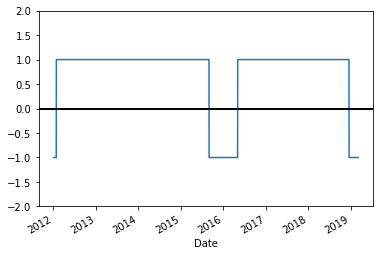

In [17]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
apple["Regime"] = np.where(apple['63d-189d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
apple["Regime"] = np.where(apple['63d-189d'] < 0, -1, apple["Regime"])
apple.loc['2012-01-04':'2019-12-31',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)





In [18]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = apple.loc[:, "Regime"].iloc[-1]
apple.loc[:, "Regime"].iloc[-1] = 0
apple["Signal"] = np.sign(apple["Regime"] - apple["Regime"].shift(1))

# Restore original regime data
#apple.loc[:, "Regime"].iloc[-1] = regime_orig
#apple.tail()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


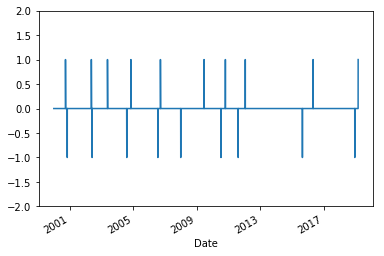

In [19]:
apple["Signal"].plot(ylim = (-2, 2))

In [20]:
apple["Signal"].value_counts()

 0.0    4803
 1.0      10
-1.0       9
Name: Signal, dtype: int64

In [21]:
apple.loc[apple["Signal"] == 1, "Close"]


Date
2000-09-29    143.625000
2002-05-17    110.900002
2003-05-23     93.760002
2004-11-11    117.860001
2006-09-22    131.470001
2009-06-22     89.279999
2010-10-25    118.699997
2012-01-26    131.880005
2016-05-04    205.009995
2019-03-06    277.329987
Name: Close, dtype: float64

In [22]:
apple.loc[apple["Signal"] == -1, "Close"]

Date
2000-11-09    140.031204
2002-06-04    104.629997
2004-08-09    107.000000
2006-07-25    126.660004
2008-01-02    144.929993
2010-07-15    109.680000
2011-08-16    119.589996
2015-09-01    191.770004
2018-12-18    255.080002
Name: Close, dtype: float64

In [23]:
apple.loc[apple["Signal"] == 0, "Close"].head()

Date
2000-01-04    139.75
2000-01-05    140.00
2000-01-06    137.75
2000-01-07    145.75
2000-01-10    146.25
Name: Close, dtype: float64

In [24]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close,63,189,63d-189d,Regime,Signal
Date,,,,,,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.4375,8164300.0,101.872139,NaN,NaN,NaN,0,NaN
2000-01-04,144.062500,139.640594,143.531204,139.7500,8089800.0,97.888344,NaN,NaN,NaN,0,0.0
2000-01-05,141.531204,137.250000,139.937500,140.0000,12177900.0,98.063423,NaN,NaN,NaN,0,0.0
2000-01-06,141.500000,137.750000,139.625000,137.7500,6227200.0,96.487427,NaN,NaN,NaN,0,0.0
2000-01-07,145.750000,140.062500,140.312500,145.7500,8066500.0,102.091049,NaN,NaN,NaN,0,0.0


In [25]:
apple_signals = pd.concat([
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == 1, "Close"],
                     "Regime": apple.loc[apple["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == -1, "Close"],
                     "Regime": apple.loc[apple["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
apple_signals.sort_index(inplace = True)
apple_signals

,Price,Regime,Signal
Date,,,
2000-09-29,143.625000,1,Buy
2000-11-09,140.031204,-1,Sell
2002-05-17,110.900002,1,Buy
2002-06-04,104.629997,-1,Sell
2003-05-23,93.760002,1,Buy
2004-08-09,107.000000,-1,Sell
2004-11-11,117.860001,1,Buy
2006-07-25,126.660004,-1,Sell
2006-09-22,131.470001,1,Buy


In [26]:
# Let's see the profitability of long trades
apple_long_profits = pd.DataFrame({
        "Price": apple_signals.loc[(apple_signals["Signal"] == "Buy") & apple_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(apple_signals["Price"] - apple_signals["Price"].shift(1)).loc[apple_signals.loc[(apple_signals["Signal"].shift(1) == "Buy") & (apple_signals["Regime"].shift(1) == 1)].index].tolist(),
        "End Date": apple_signals["Price"].loc[apple_signals.loc[(apple_signals["Signal"].shift(1) == "Buy") & (apple_signals["Regime"].shift(1) == 1)].index].index
    })
apple_long_profits


,Price,Profit,End Date
Date,,,
2000-09-29,143.625000,-3.593796,2000-11-09
2002-05-17,110.900002,-6.270004,2002-06-04
2003-05-23,93.760002,13.239998,2004-08-09
2004-11-11,117.860001,8.800003,2006-07-25
2006-09-22,131.470001,13.459991,2008-01-02
2009-06-22,89.279999,20.400002,2010-07-15
2010-10-25,118.699997,0.889999,2011-08-16
2012-01-26,131.880005,59.889999,2015-09-01
2016-05-04,205.009995,50.070007,2018-12-18


In [27]:
apple_signals


,Price,Regime,Signal
Date,,,
2000-09-29,143.625000,1,Buy
2000-11-09,140.031204,-1,Sell
2002-05-17,110.900002,1,Buy
2002-06-04,104.629997,-1,Sell
2003-05-23,93.760002,1,Buy
2004-08-09,107.000000,-1,Sell
2004-11-11,117.860001,1,Buy
2006-07-25,126.660004,-1,Sell
2006-09-22,131.470001,1,Buy


In [28]:
# We need to get the low of the price during each trade.
tradeperiods = pd.DataFrame({"Start": apple_long_profits.index,
                            "End": apple_long_profits["End Date"]})
apple_long_profits["Low"] = tradeperiods.apply(lambda x: min(apple.loc[x["Start"]:x["End"], "Low"]), axis = 1)
apple_long_profits


,Price,Profit,End Date,Low
Date,,,,
2000-09-29,143.625000,-3.593796,2000-11-09,130.156204
2002-05-17,110.900002,-6.270004,2002-06-04,103.550003
2003-05-23,93.760002,13.239998,2004-08-09,93.070000
2004-11-11,117.860001,8.800003,2006-07-25,113.550003
2006-09-22,131.470001,13.459991,2008-01-02,131.000000
2009-06-22,89.279999,20.400002,2010-07-15,87.000000
2010-10-25,118.699997,0.889999,2011-08-16,110.269997
2012-01-26,131.880005,59.889999,2015-09-01,127.139999
2016-05-04,205.009995,50.070007,2018-12-18,198.649994


In [29]:
# Now we have all the information needed to simulate this strategy in apple_adj_long_profits
cash = 1000000
apple_backtest = pd.DataFrame({"Start Port. Value": [],
                         "End Port. Value": [],
                         "End Date": [],
                         "Shares": [],
                         "Share Price": [],
                         "Trade Value": [],
                         "Profit per Share": [],
                         "Total Profit": [],
                         "Stop-Loss Triggered": []})
port_value = .1  # Max proportion of portfolio bet on any trade
batch = 100      # Number of shares bought per batch
stoploss = .2    # % of trade loss that would trigger a stoploss
for index, row in apple_long_profits.iterrows():
    batches = np.floor(cash * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
    trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
    if row["Low"] < (1 - stoploss) * row["Price"]:   # Account for the stop-loss
        share_profit = np.round((1 - stoploss) * row["Price"], 2)
        stop_trig = True
    else:
        share_profit = row["Profit"]
        stop_trig = False
    profit = share_profit * batches * batch # Compute profits
    # Add a row to the backtest data frame containing the results of the trade
    apple_backtest = apple_backtest.append(pd.DataFrame({
                "Start Port. Value": cash,
                "End Port. Value": cash + profit,
                "End Date": row["End Date"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": trade_val,
                "Profit per Share": share_profit,
                "Total Profit": profit,
                "Stop-Loss Triggered": stop_trig
            }, index = [index]))
    cash = max(0, cash + profit)
 
apple_backtest

,Start Port. Value,End Port. Value,End Date,Shares,Share Price,Trade Value,Profit per Share,Total Profit,Stop-Loss Triggered
2000-09-29,1.000000e+06,9.978437e+05,2000-11-09,600.0,143.625000,86175.000000,-3.593796,-2156.277466,0.0
2002-05-17,9.978437e+05,9.928277e+05,2002-06-04,800.0,110.900002,88720.001221,-6.270004,-5016.003418,0.0
2003-05-23,9.928277e+05,1.006068e+06,2004-08-09,1000.0,93.760002,93760.002136,13.239998,13239.997864,0.0
2004-11-11,1.006068e+06,1.013108e+06,2006-07-25,800.0,117.860001,94288.000488,8.800003,7040.002441,0.0
2006-09-22,1.013108e+06,1.022530e+06,2008-01-02,700.0,131.470001,92029.000854,13.459991,9421.994019,0.0
2009-06-22,1.022530e+06,1.044970e+06,2010-07-15,1100.0,89.279999,98207.998657,20.400002,22440.001678,0.0
2010-10-25,1.044970e+06,1.045682e+06,2011-08-16,800.0,118.699997,94959.997559,0.889999,711.999512,0.0
2012-01-26,1.045682e+06,1.087605e+06,2015-09-01,700.0,131.880005,92316.003418,59.889999,41922.999573,0.0
2016-05-04,1.087605e+06,1.112640e+06,2018-12-18,500.0,205.009995,102504.997253,50.070007,25035.003662,0.0


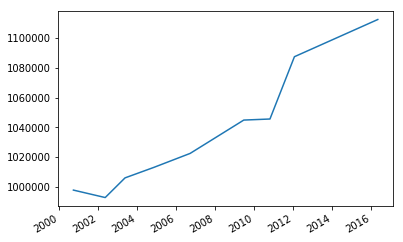

In [30]:
apple_backtest["End Port. Value"].plot()